In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [96]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
import zipfile
import os

# Path to your zip file (adjust as needed)
zip_path = '/Users/manishkumar/Desktop/FreshFirst/archive.zip'

# Extract to this folder (can be '.' for current directory)
extract_to = '.'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Zip extracted successfully!")


✅ Zip extracted successfully!


In [79]:
import os

# Replace with your actual folder name where files were extracted
extracted_path = '/Users/manishkumar/Desktop/FreshFirst/archive.zip'

# List all files
for root, dirs, files in os.walk(extracted_path):
    for file in files:
        print(os.path.join(root, file))

In [80]:
import pandas as pd
df = pd.read_csv('BigBasket Products.csv') 
df.head()  


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [81]:
new = df['sub_category'].unique()
print(new)

['Hair Care' 'Storage & Accessories' 'Pooja Needs' 'Bins & Bathroom Ware'
 'Bath & Hand Wash' 'All Purpose Cleaners' 'Skin Care'
 'Mops, Brushes & Scrubs' 'Cooking & Baking Needs' 'Chocolates & Biscuits'
 'Fresheners & Repellents' 'Snacks, Dry Fruits, Nuts' 'Dairy & Cheese'
 'Pasta, Soup & Noodles' 'Dry Fruits' 'Drinks & Beverages'
 'Kitchen Accessories' 'Flask & Casserole' 'Breakfast Cereals'
 'Frozen Veggies & Snacks' 'Fruit Juices & Drinks' 'Cookies, Rusk & Khari'
 'Fragrances & Deos' 'Tea' 'Masalas & Spices' "Men's Grooming"
 'Chocolates & Candies' 'Steel Utensils' 'Tinned & Processed Food'
 'Organic Staples' 'Sauces, Spreads & Dips' 'Pickles & Chutney'
 'Ready To Cook & Eat' 'Baby Bath & Hygiene' 'Stationery'
 'Pet Food & Accessories' 'Biscuits & Cookies' 'Oral Care'
 'Snacks & Namkeen' 'Detergents & Dishwash' 'Crockery & Cutlery'
 'Cuts & Sprouts' 'Health & Medicine' 'Cookware & Non Stick' 'Dairy'
 'Feminine Hygiene' 'Diapers & Wipes' 'Edible Oils & Ghee'
 'Baby Food & Formula' '

In [82]:
from sklearn.preprocessing import LabelEncoder

# Fit LabelEncoder to sub_category
le = LabelEncoder()
df['sub_category_encoded'] = le.fit_transform(df['sub_category'])

# Preview encoding
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'All Purpose Cleaners': np.int64(0), 'Appliances & Electricals': np.int64(1), 'Atta, Flours & Sooji': np.int64(2), 'Baby Accessories': np.int64(3), 'Baby Bath & Hygiene': np.int64(4), 'Baby Food & Formula': np.int64(5), 'Bakery Snacks': np.int64(6), 'Bakeware': np.int64(7), 'Bath & Hand Wash': np.int64(8), 'Bins & Bathroom Ware': np.int64(9), 'Biscuits & Cookies': np.int64(10), 'Breads & Buns': np.int64(11), 'Breakfast Cereals': np.int64(12), 'Cakes & Pastries': np.int64(13), 'Car & Shoe Care': np.int64(14), 'Cereals & Breakfast': np.int64(15), 'Chocolates & Biscuits': np.int64(16), 'Chocolates & Candies': np.int64(17), 'Coffee': np.int64(18), 'Cookies, Rusk & Khari': np.int64(19), 'Cooking & Baking Needs': np.int64(20), 'Cookware & Non Stick': np.int64(21), 'Crockery & Cutlery': np.int64(22), 'Cuts & Sprouts': np.int64(23), 'Dairy': np.int64(24), 'Dairy & Cheese': np.int64(25), 'Dals & Pulses': np.int64(26), 'Detergents & Dishwash': np.int64(27), 'Diapers & Wipes': np.int64(28), 'Dis

In [83]:
# category_map = {
#     'All Purpose Cleaners': 0, 'Appliances & Electricals': 1, 'Atta, Flours & Sooji': 2,
#     'Baby Accessories': 3, 'Baby Bath & Hygiene': 4, 'Baby Food & Formula': 5,
#     'Bakery Snacks': 6, 'Bakeware': 7, 'Bath & Hand Wash': 8, 'Bins & Bathroom Ware': 9,
#     'Biscuits & Cookies': 10, 'Breads & Buns': 11, 'Breakfast Cereals': 12,
#     'Cakes & Pastries': 13, 'Car & Shoe Care': 14, 'Cereals & Breakfast': 15,
#     'Chocolates & Biscuits': 16, 'Chocolates & Candies': 17, 'Coffee': 18,
#     'Cookies, Rusk & Khari': 19, 'Cooking & Baking Needs': 20, 'Cookware & Non Stick': 21,
#     'Crockery & Cutlery': 22, 'Cuts & Sprouts': 23, 'Dairy': 24, 'Dairy & Cheese': 25,
#     'Dals & Pulses': 26, 'Detergents & Dishwash': 27, 'Diapers & Wipes': 28,
#     'Disposables, Garbage Bag': 29, 'Drinks & Beverages': 30, 'Dry Fruits': 31,
#     'Edible Oils & Ghee': 32, 'Eggs': 33, 'Energy & Soft Drinks': 34,
#     'Exotic Fruits & Veggies': 35, 'Feeding & Nursing': 36, 'Feminine Hygiene': 37,
#     'Fish & Seafood': 38, 'Flask & Casserole': 39, 'Flower Bouquets, Bunches': 40,
#     'Fragrances & Deos': 41, 'Fresh Fruits': 42, 'Fresh Vegetables': 43,
#     'Fresheners & Repellents': 44, 'Frozen Veggies & Snacks': 45, 'Fruit Juices & Drinks': 46,
#     'Gardening': 47, 'Gourmet Breads': 48, 'Hair Care': 49, 'Health & Medicine': 50,
#     'Health Drink, Supplement': 51, 'Herbs & Seasonings': 52, 'Ice Creams & Desserts': 53,
#     'Indian Mithai': 54, 'Kitchen Accessories': 55, 'Makeup': 56, 'Marinades': 57,
#     'Masalas & Spices': 58, "Men's Grooming": 59, 'Mops, Brushes & Scrubs': 60,
#     'Mothers & Maternity': 61, 'Mutton & Lamb': 62, 'Non Dairy': 63,
#     'Noodle, Pasta, Vermicelli': 64, 'Oils & Vinegar': 65, 'Oral Care': 66,
#     'Organic Fruits & Vegetables': 67, 'Organic Staples': 68, 'Party & Festive Needs': 69,
#     'Pasta, Soup & Noodles': 70, 'Pet Food & Accessories': 71, 'Pickles & Chutney': 72,
#     'Pooja Needs': 73, 'Pork & Other Meats': 74, 'Ready To Cook & Eat': 75,
#     'Rice & Rice Products': 76, 'Salt, Sugar & Jaggery': 77, 'Sauces, Spreads & Dips': 78,
#     'Sausages, Bacon & Salami': 79, 'Skin Care': 80, 'Snacks & Namkeen': 81,
#     'Snacks, Dry Fruits, Nuts': 82, 'Spreads, Sauces, Ketchup': 83, 'Stationery': 84,
#     'Steel Utensils': 85, 'Storage & Accessories': 86, 'Tea': 87,
#     'Tinned & Processed Food': 88, 'Water': 89
# }


In [84]:
# df["sub_category_encoded"] = df["sub_category"].map(category_map)

In [85]:
# df["sub_category_encoded"] = df["sub_category"].map(category_map).fillna(-1).astype(int)

In [86]:
# FEATURES = [
#     "arrival_days",
#     "transit_days",
#     "shelf_life_days",
#     "remaining_life_at_departure",
#     "margin_on_arrival",
#     "log_unit_cost",
#     "sub_category_encoded"   # ← now included
# ]

In [87]:
df['sale_price'] = df['sale_price'].fillna(df['sale_price'].mean())
df['sub_category'] = df['sub_category'].fillna("Unknown")

In [88]:
le = LabelEncoder()
df['sub_category_encoded'] = le.fit_transform(df['sub_category'])

In [89]:
# Create a mock shelf life column (e.g., dairy = 4, others = 30)
np.random.seed(42)
df['shelf_life_days'] = np.random.randint(3, 30, size=len(df))

# Create mock arrival_days (simulate days since arrived at warehouse)
df['arrival_days'] = np.random.randint(0, 10, size=len(df))

# Derive margin (how much time is left before expiry at delivery)
df['margin_on_arrival'] = df['shelf_life_days'] - df['arrival_days']

# Target: If margin <= 2 → use first
df['use_first'] = (df['margin_on_arrival'] <= 2).astype(int)

In [90]:
FEATURES = ['sale_price', 'sub_category_encoded']
TARGET = 'use_first'

X = df[FEATURES]
y = df[TARGET]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Add predictions to original data
df['predicted_use_first'] = model.predict(X)
df['risk_probability'] = model.predict_proba(X)[:, 1]

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      5748
           1       0.00      0.00      0.00      1141

    accuracy                           0.83      6889
   macro avg       0.42      0.50      0.45      6889
weighted avg       0.70      0.83      0.76      6889



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [91]:
# See sample output
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
print(df[['product','risk_probability']].head())

                                             product  risk_probability
0             Garlic Oil - Vegetarian Capsule 500 mg          0.165639
1                              Water Bottle - Orange          0.163533
2                     Brass Angle Deep - Plain, No.2          0.164249
3  Cereal Flip Lid Container/Storage Jar - Assort...          0.167907
4                 Creme Soft Soap - For Hands & Body          0.167969


/var/folders/79/sw6wp4nj4lnddhfx5d2k40j80000gn/T/ipykernel_78561/1833425958.py:11: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


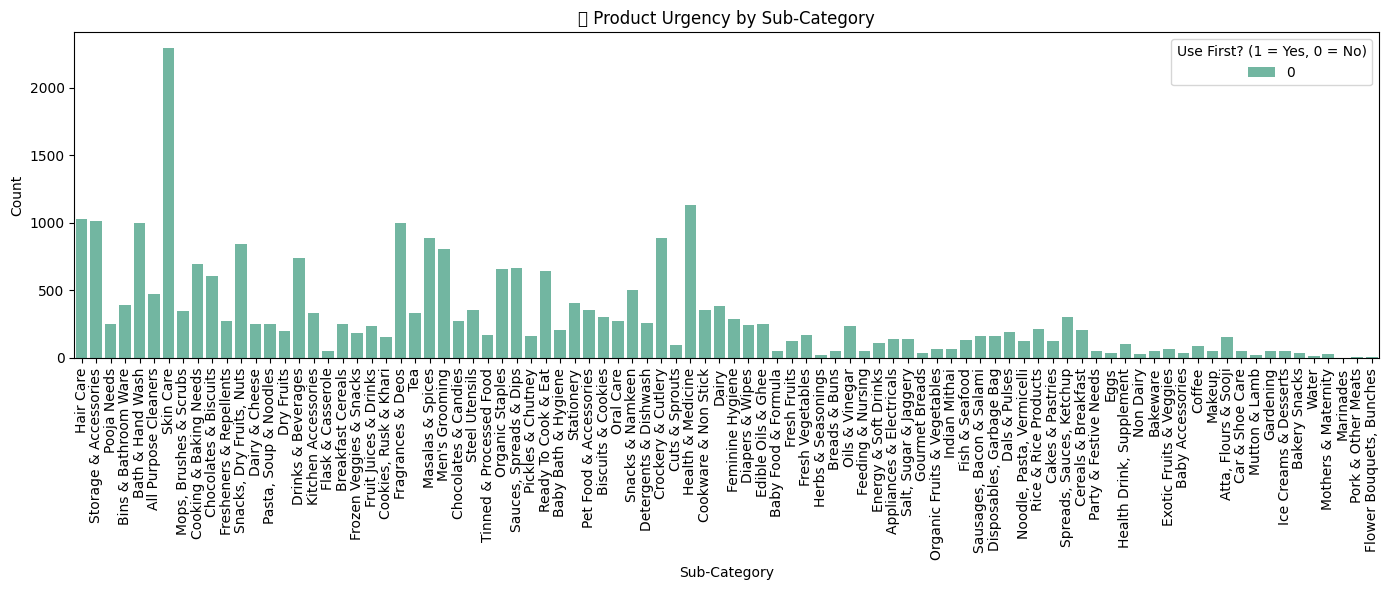

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='sub_category', hue='predicted_use_first', palette='Set2')
plt.title("🛒 Product Urgency by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='Use First? (1 = Yes, 0 = No)')
plt.tight_layout()
plt.show()
